In [1]:
#importing library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
#initialized iris dataset as df

df= sns.load_dataset("iris")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# domain analysis

Here, we are analyzing Iris flowers. Our dataset contains three subspecies of Iris, which are differentiated based on their measurement values. These measurements will serve as the key features for building our machine learning model.

The task which is we gonna perform is classification task

# Basic Check

All values in the dataset are non-null, and no corrupted data points were found.

Hence , no need of any imputation method

4 inputs feature and species is our output feature

In [4]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Exploratory Data Analysis

Exploratory Data Analysis (EDA)

The output column (species) is fully balanced.

Insights from Petal Length vs. Petal Width Plot
Data points are well-clustered, with clear separation between species.

Insights from Sepal Length vs. Sepal Width Plot
Setosa has a wider sepal width compared to other species.
Versicolor and Virginica have similar sepal widths, but their sepal lengths differ.

No corrupted or missing data points were found

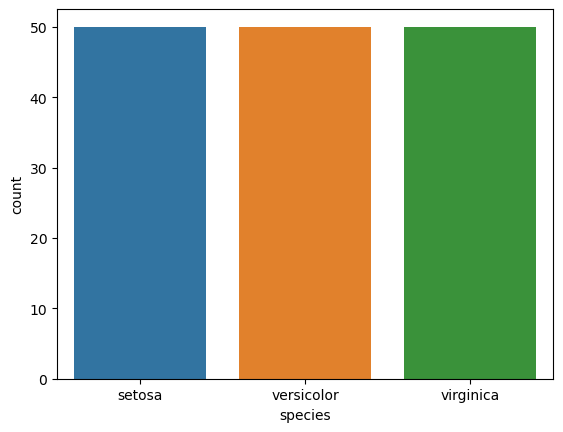

In [8]:
sns.countplot(x=df.species , hue=df.species)
plt.show()

<Axes: xlabel='petal_length', ylabel='petal_width'>

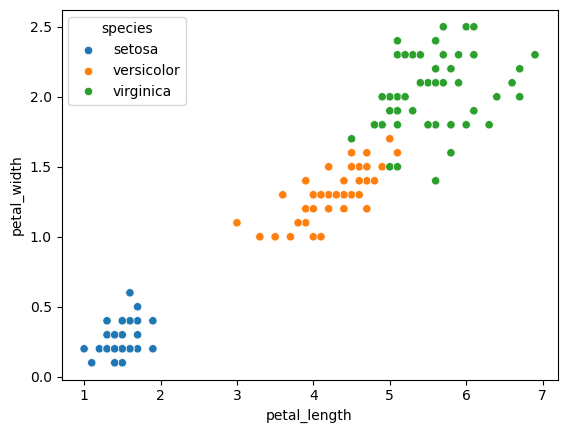

In [9]:
sns.scatterplot(x=df['petal_length'] , y=df['petal_width'] , hue=df['species'])

<Axes: xlabel='sepal_length', ylabel='sepal_width'>

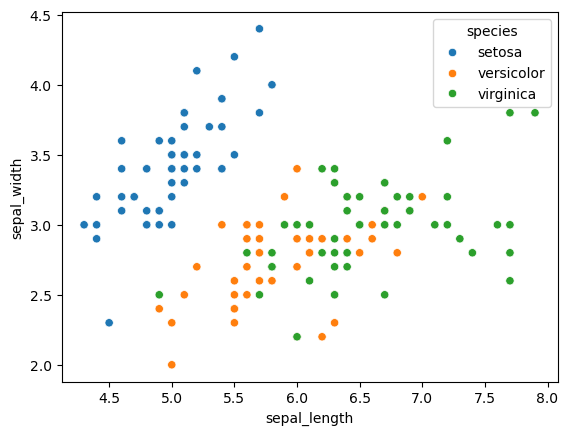

In [10]:
sns.scatterplot(x=df['sepal_length'] , y=df['sepal_width'] , hue=df['species'])

# Feature Engineering

As analyzed in the Basic Check, there are no missing or corrupted values, so no imputation is needed.

The output column is well-balanced, so no data balancing is required.

The dataset contains only 4 features, and each feature is crucially important for classification.

but outliers handeling for input features and encoding for output feature is required .

# handling outliers

<Axes: xlabel='sepal_length'>

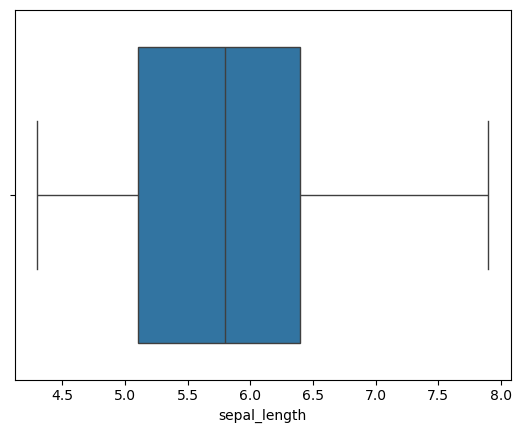

In [11]:
#sepal_length outliers handling
#0 outliers founded

sns.boxplot(x=df['sepal_length'])

<Axes: xlabel='sepal_width'>

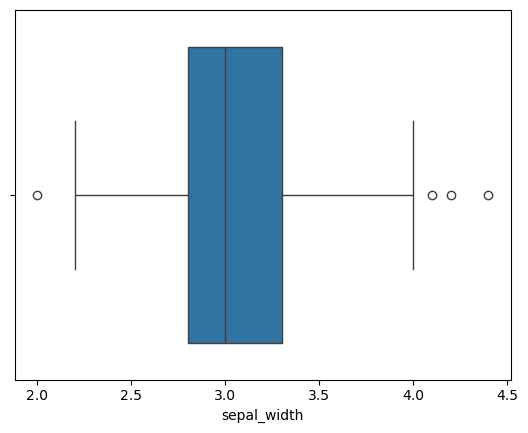

In [12]:
#4 outliers in sepal_width

sns.boxplot(x=df['sepal_width'])

In [13]:
df['sepal_width'].median()

3.0

In [14]:
#handled outliers 

df.loc[df['sepal_width']>4.0 , 'sepal_width'] = 3.0
df.loc[df['sepal_width']<2.2 , 'sepal_width'] = 3.0

<Axes: xlabel='petal_length'>

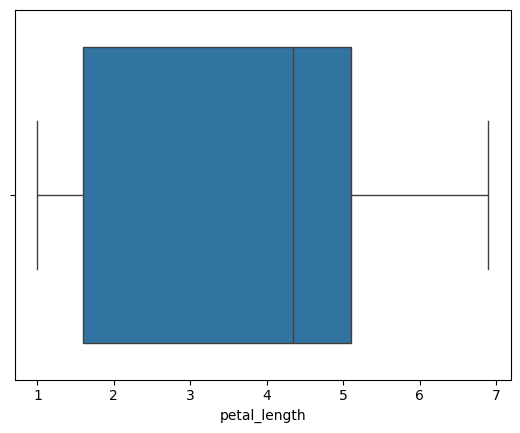

In [15]:
# 0 outliers founded

sns.boxplot(x=df['petal_length'])

<Axes: xlabel='petal_width'>

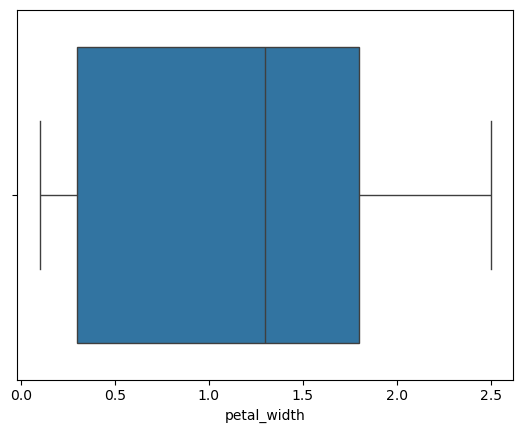

In [16]:
# 0 outliers

sns.boxplot(x=df['petal_width'])

# Encoding output column with onehot encoding

In [17]:
#imported encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le

LabelEncoder()

In [18]:
df['species'] = le.fit_transform(df['species'])

# scaling input columns

In [19]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
std_scaler

StandardScaler()

In [20]:
df.iloc[ : , :-1] = std_scaler.fit_transform(df.iloc[ : , :-1])

# Spliting data into training and testing

In [21]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.177514,-1.340227,-1.315444,0
1,-1.143017,-0.100540,-1.340227,-1.315444,0
2,-1.385353,0.410681,-1.397064,-1.315444,0
3,-1.506521,0.155071,-1.283389,-1.315444,0
4,-1.021849,1.433125,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.100540,0.819596,1.448832,2
146,0.553333,-1.378594,0.705921,0.922303,2
147,0.795669,-0.100540,0.819596,1.053935,2
148,0.432165,0.921903,0.933271,1.448832,2


In [22]:
#input feature created
input_features=df.iloc[: , :-1]

In [23]:
#output feature created
output_feature=df['species']

In [24]:
#spliting data into training testing

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(input_features , output_feature , test_size=0.20 , random_state=21)

In [58]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
41,-1.627688,-1.889816,-1.397064,-1.183812
131,2.492019,1.944346,1.501645,1.053935
70,0.068662,0.410681,0.592246,0.790671
46,-0.900681,1.944346,-1.226552,-1.315444
126,0.432165,-0.611762,0.592246,0.790671
...,...,...,...,...
120,1.280340,0.410681,1.103783,1.448832
112,1.159173,-0.100540,0.990108,1.185567
48,-0.658345,1.688735,-1.283389,-1.315444
4,-1.021849,1.433125,-1.340227,-1.315444


# Model Selection

# Knn

In [26]:
#imported model

from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn

KNeighborsClassifier()

In [27]:
from sklearn.metrics import accuracy_score , f1_score

In [28]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [29]:
predicted=knn.predict(x_test)

In [30]:
accuracy_score(y_test , predicted)

0.9

In [31]:
f1_score(y_test , predicted , average='weighted')

0.9011594202898551

In [32]:
pd.crosstab(y_test,predicted)

col_0,0,1,2
species,,,
0,11,0,0
1,0,10,2
2,0,1,6


# Logistic Rregression

In [33]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr

LogisticRegression()

In [34]:
lr.fit(x_train , y_train)

LogisticRegression()

In [35]:
predicted=lr.predict(x_test)

In [36]:
accuracy_score(y_test , predicted)

0.9333333333333333

In [37]:
f1_score(y_test , predicted , average='weighted')

0.9344696969696968

# Svm - Support Vector Machine

In [38]:
from sklearn.svm import SVC
svm=SVC()
svm

SVC()

In [39]:
svm.fit(x_train , y_train)

SVC()

In [40]:
pred=svm.predict(x_test)

In [41]:
accuracy_score(y_test , pred)

0.9333333333333333

In [42]:
f1_score(y_test , pred , average='weighted')

0.9344696969696968

# Hyperparameter Tuning 

# SVM

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_hyp=SVC()

In [44]:
param_grid = {
    'C': [0.1,0.01, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],     

    'gamma': ['scale', 'auto']}

In [45]:
grid=GridSearchCV(svc_hyp , param_grid=param_grid , cv=3 , verbose=3 , n_jobs=1 , refit=True , scoring='accuracy')
grid.fit(x_train , y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits
[CV 1/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.925 total time=   0.0s
[CV 2/3] END .C=0.1, gamma=scale, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/3] END .C=0.1, gamma=scale, kernel=linear;, score=0.975 total time=   0.0s
[CV 1/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.800 total time=   0.0s
[CV 2/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.925 total time=   0.0s
[CV 3/3] END ...C=0.1, gamma=scale, kernel=poly;, score=0.825 total time=   0.0s
[CV 1/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.750 total time=   0.0s
[CV 2/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/3] END ....C=0.1, gamma=scale, kernel=rbf;, score=0.925 total time=   0.0s
[CV 1/3] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.825 total time=   0.0s
[CV 2/3] END C=0.1, gamma=scale, kernel=sigmoid;, score=0.825 total time=   0.0s
[CV 3/3] END C=0.1, gamma=scale, kernel=sigmoid

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 0.01, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [56]:
grid

GridSearchCV(cv=3, estimator=SVC(), n_jobs=1,
             param_grid={'C': [0.1, 0.01, 1, 10, 100],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [60]:
pred=grid.predict(x_test)

In [61]:
accuracy_score(y_test , pred)

0.9333333333333333

In [62]:
f1_score(y_test , pred , average='weighted')

0.9344696969696968

In [49]:
pd.crosstab(y_test , pred)

col_0,0,1,2
species,,,
0,11,0,0
1,0,10,2
2,0,0,7


# Cross Validation

In [66]:
from sklearn.model_selection import cross_val_score

cross_score=cross_val_score(grid.best_estimator_ , input_features , output_feature , cv=8  , scoring='accuracy')

print('mean of scores=' , cross_score.mean())
print('std of scores=' , cross_score.std())
print('all scores=' , cross_score)

mean of scores= 0.9736842105263157
std of scores= 0.037216146378239355
all scores= [1.         1.         0.94736842 0.94736842 1.         0.89473684
 1.         1.        ]
